<a href="https://colab.research.google.com/github/whdPdms04/2025-1-myclass-BDA/blob/main/inclass/07w_B_wed_0416_easy_ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

단원 07 데이터 정제

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'sex': ["M", 'F', np.nan, 'M', 'F'],
                   'score': [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [ ]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [ ]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [ ]:
df.isna()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [ ]:
pd.isnull(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [ ]:
df.isnull()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [ ]:
pd.isna(df).sum()

sex      1
score    1
dtype: int64

In [ ]:
# 행끼리 더함
pd.isna(df).sum(axis=0)

sex      1
score    1
dtype: int64

In [ ]:
pd.isna(df).sum(axis='index')

sex      1
score    1
dtype: int64

In [ ]:
# 열끼리 더함
pd.isna(df).sum(axis=1)

0    0
1    0
2    1
3    0
4    1
dtype: int64

In [ ]:
pd.isna(df).sum(axis='columns')

0    0
1    0
2    1
3    0
4    1
dtype: int64

In [ ]:
s = pd.Series([True, False, True])
s

0     True
1    False
2     True
dtype: bool

In [ ]:
s.sum()

np.int64(2)

In [ ]:
s.any()

np.True_

In [ ]:
s.all()

np.False_

In [ ]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [ ]:
df.isnull()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [ ]:
df.isnull().any()

sex      True
score    True
dtype: bool

In [ ]:
df.isna().any()

sex      True
score    True
dtype: bool

In [ ]:
df.isna().all()

sex      False
score    False
dtype: bool

In [ ]:
df.notnull()

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [ ]:
df.notnull().any()

sex      True
score    True
dtype: bool

In [ ]:
df.notnull().all()

sex      False
score    False
dtype: bool

In [ ]:
df.notna().any()

sex      True
score    True
dtype: bool

In [ ]:
df.notna().all()

sex      False
score    False
dtype: bool

In [ ]:
df.isna().any(axis=0)

sex      True
score    True
dtype: bool

In [ ]:
df.isna().any(axis=1)

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [ ]:
~df.isna().any(axis=1)

0     True
1     True
2    False
3     True
4    False
dtype: bool

In [ ]:
df.notna().any(axis=1)

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [ ]:
~df.notna().any(axis=1)

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [ ]:
# 적어도 하나 이상 NaN인 행을 추출, 시험 예상
df[df.isna().any(axis=1)]

,sex,score
2,NaN,3.0
4,F,NaN


In [ ]:
# NaN이 하나도 없는 행을 추출, 시험 예상
df[~df.isna().any(axis=1)]

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


## 결측 값 시각화

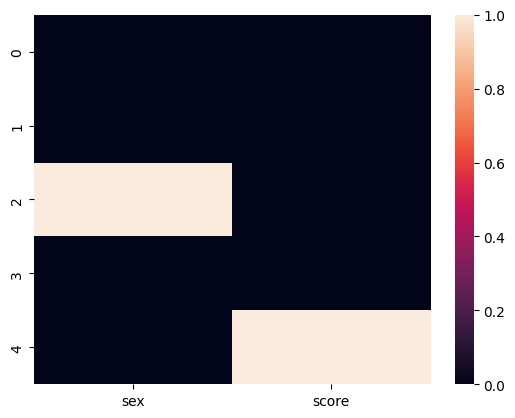

In [ ]:
import seaborn as sns

sns.heatmap(df.isnull());

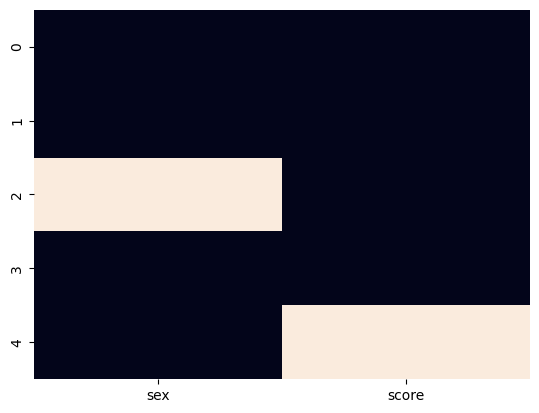

In [ ]:
sns.heatmap(df.isnull(), cbar=False);

In [ ]:
# %pip install missingno

Note: you may need to restart the kernel to use updated packages.


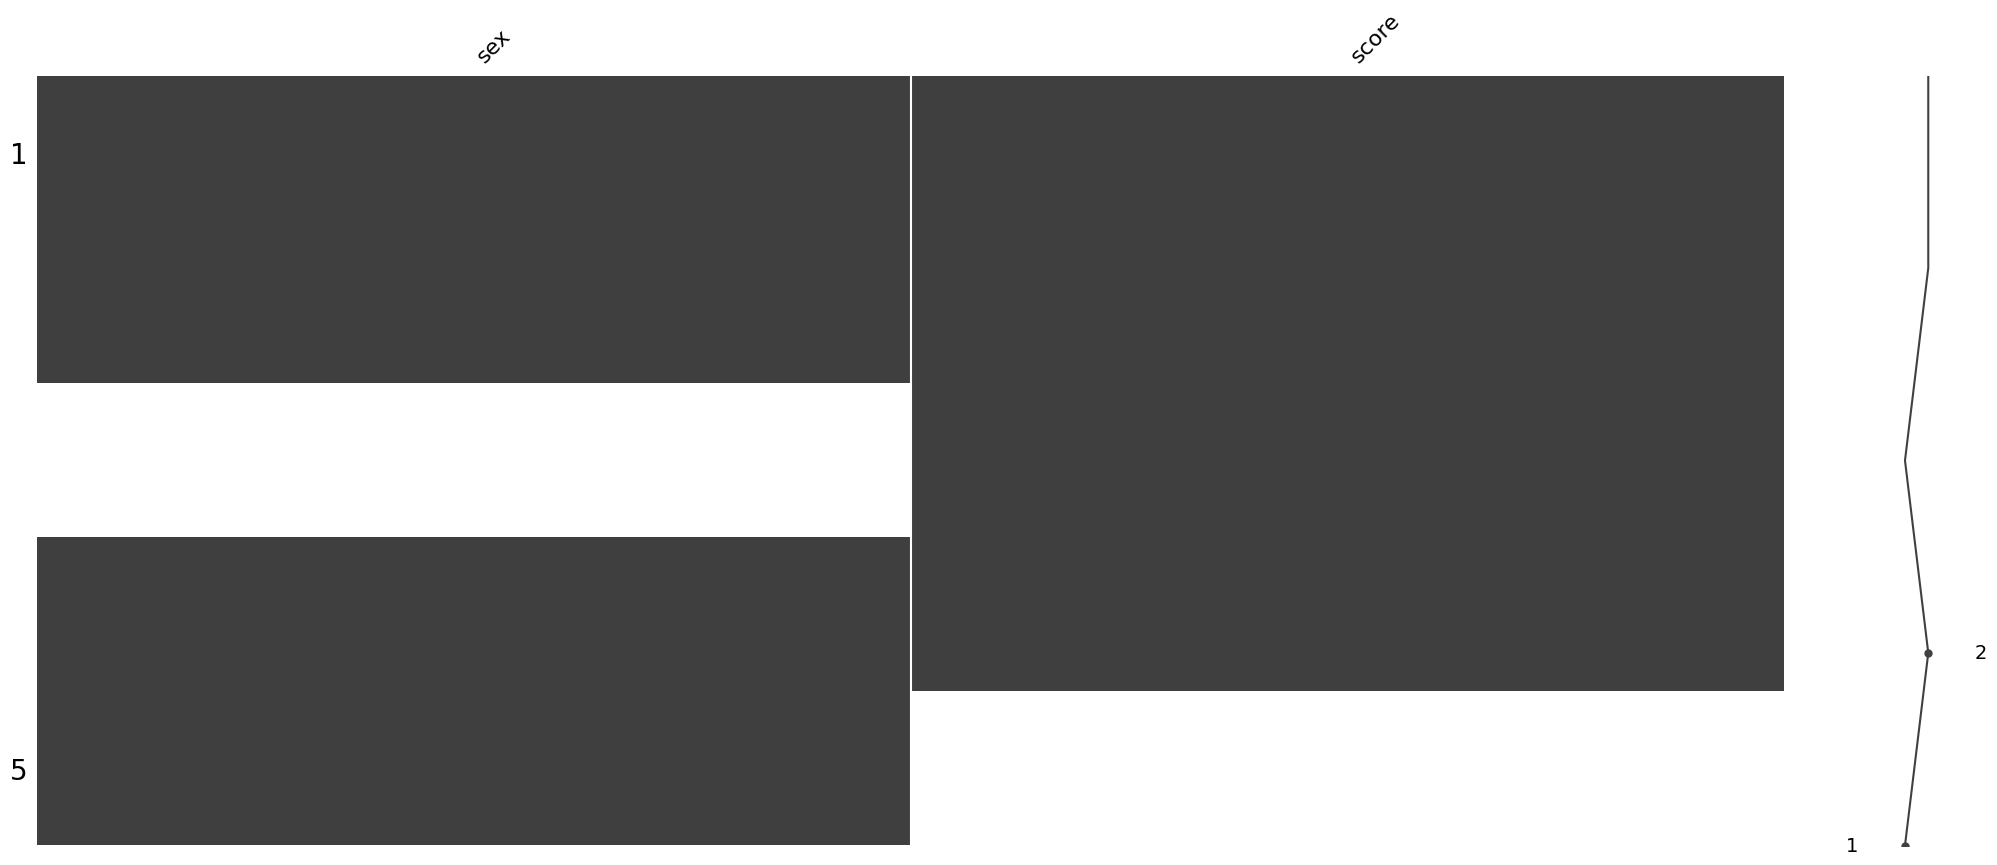

In [ ]:
import missingno as msno

msno.matrix(df);

In [ ]:
tdf = sns.load_dataset('titanic')
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


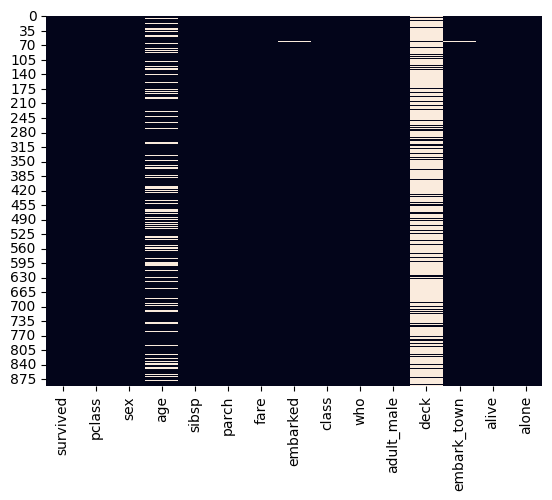

In [ ]:
sns.heatmap(tdf.isnull(), cbar=False);

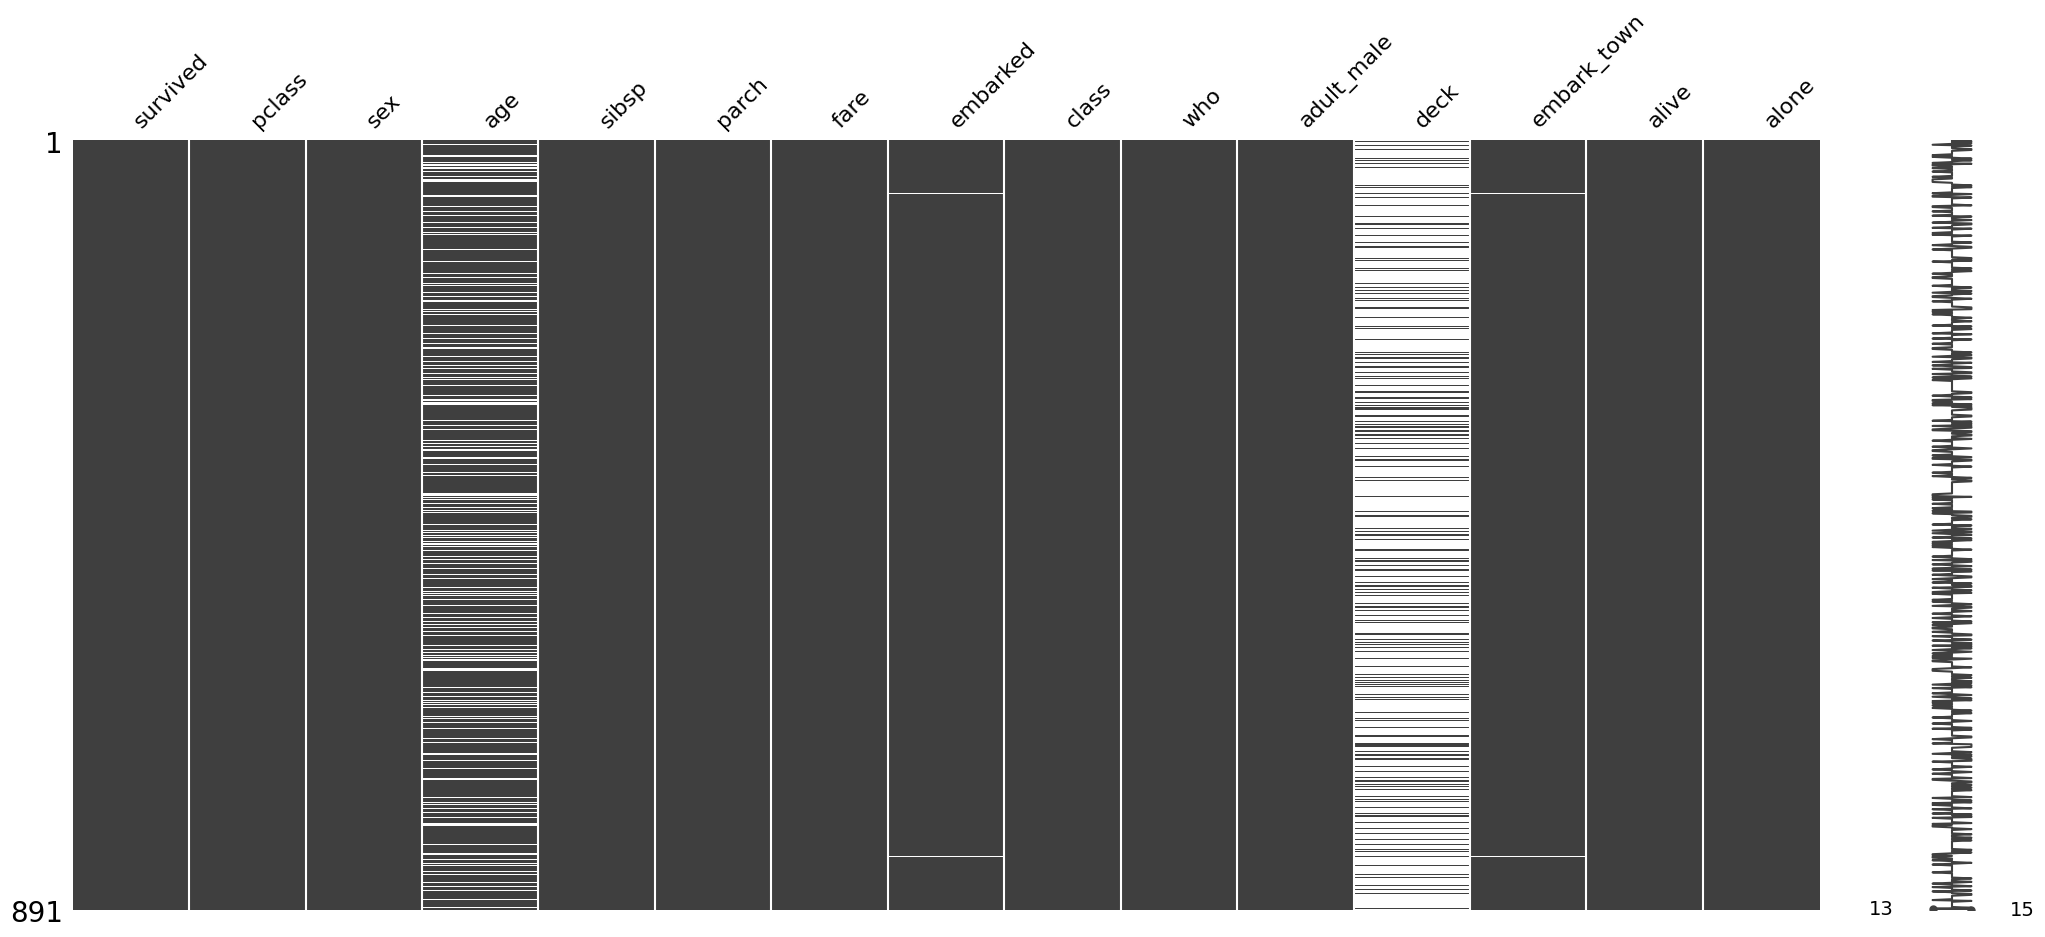

In [ ]:
msno.matrix(tdf);

오른쪽의 스파크라인은 데이터 완성도의 일반적인 모양을 요약하고 데이터 세트에서 최대 및 최소 널링이 있는 행을 가리킵니다.

행마다 15개중 NaN이 아닌 유효한 데이터의 갯수를 나타내고 그 점을 다음 행과 연결한 선

In [ ]:
tdf2 = tdf.sample(20)
tdf2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
317,0,2,male,54.0,0,0,14.0000,S,Second,man,True,NaN,Southampton,no,True
750,1,2,female,4.0,1,1,23.0000,S,Second,child,False,NaN,Southampton,yes,False
500,0,3,male,17.0,0,0,8.6625,S,Third,man,True,NaN,Southampton,no,True
250,0,3,male,NaN,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
445,1,1,male,4.0,0,2,81.8583,S,First,child,False,A,Southampton,yes,False


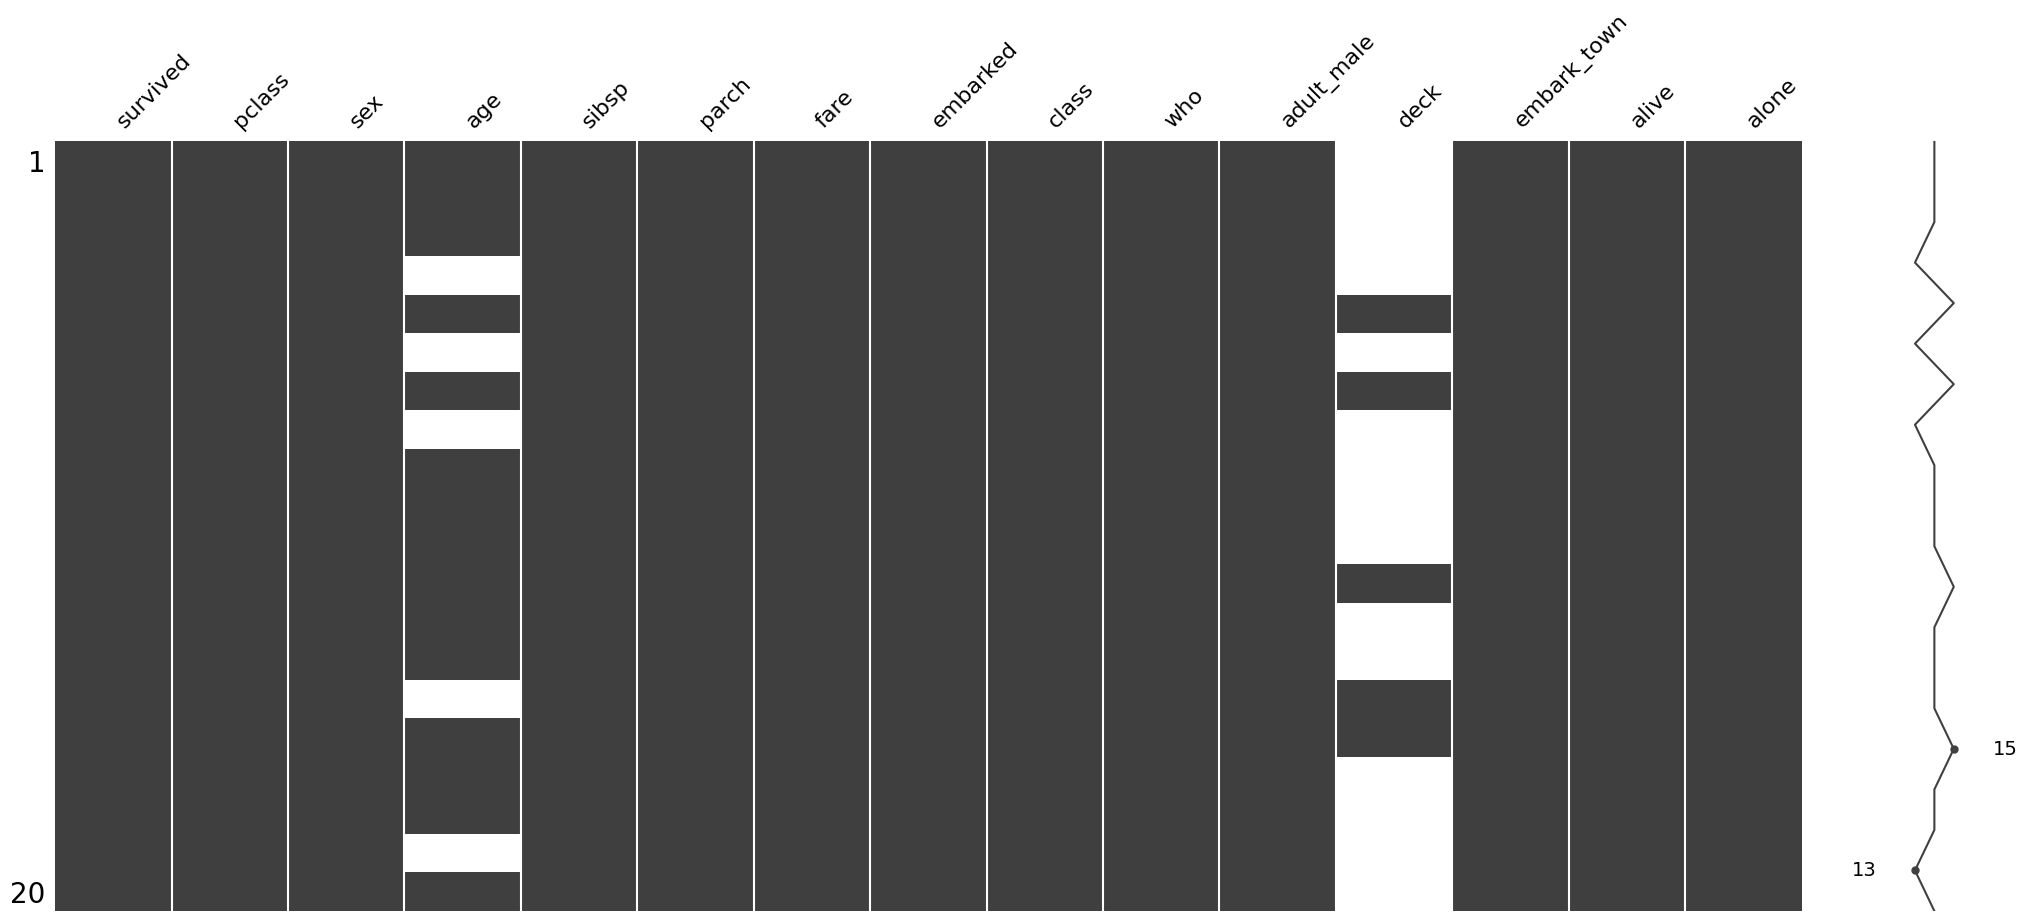

In [ ]:
msno.matrix(tdf2);

In [ ]:
# NaN이 1개인 행을 추출
tdf[tdf.isna().sum(axis=1) == 1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True


In [ ]:
# NaN이 2개인 행을 추출
tdf[tdf.isna().sum(axis=1) == 2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# NaN이 3개인 행을 추출
tdf[tdf.isna().sum(axis=1) == 3]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


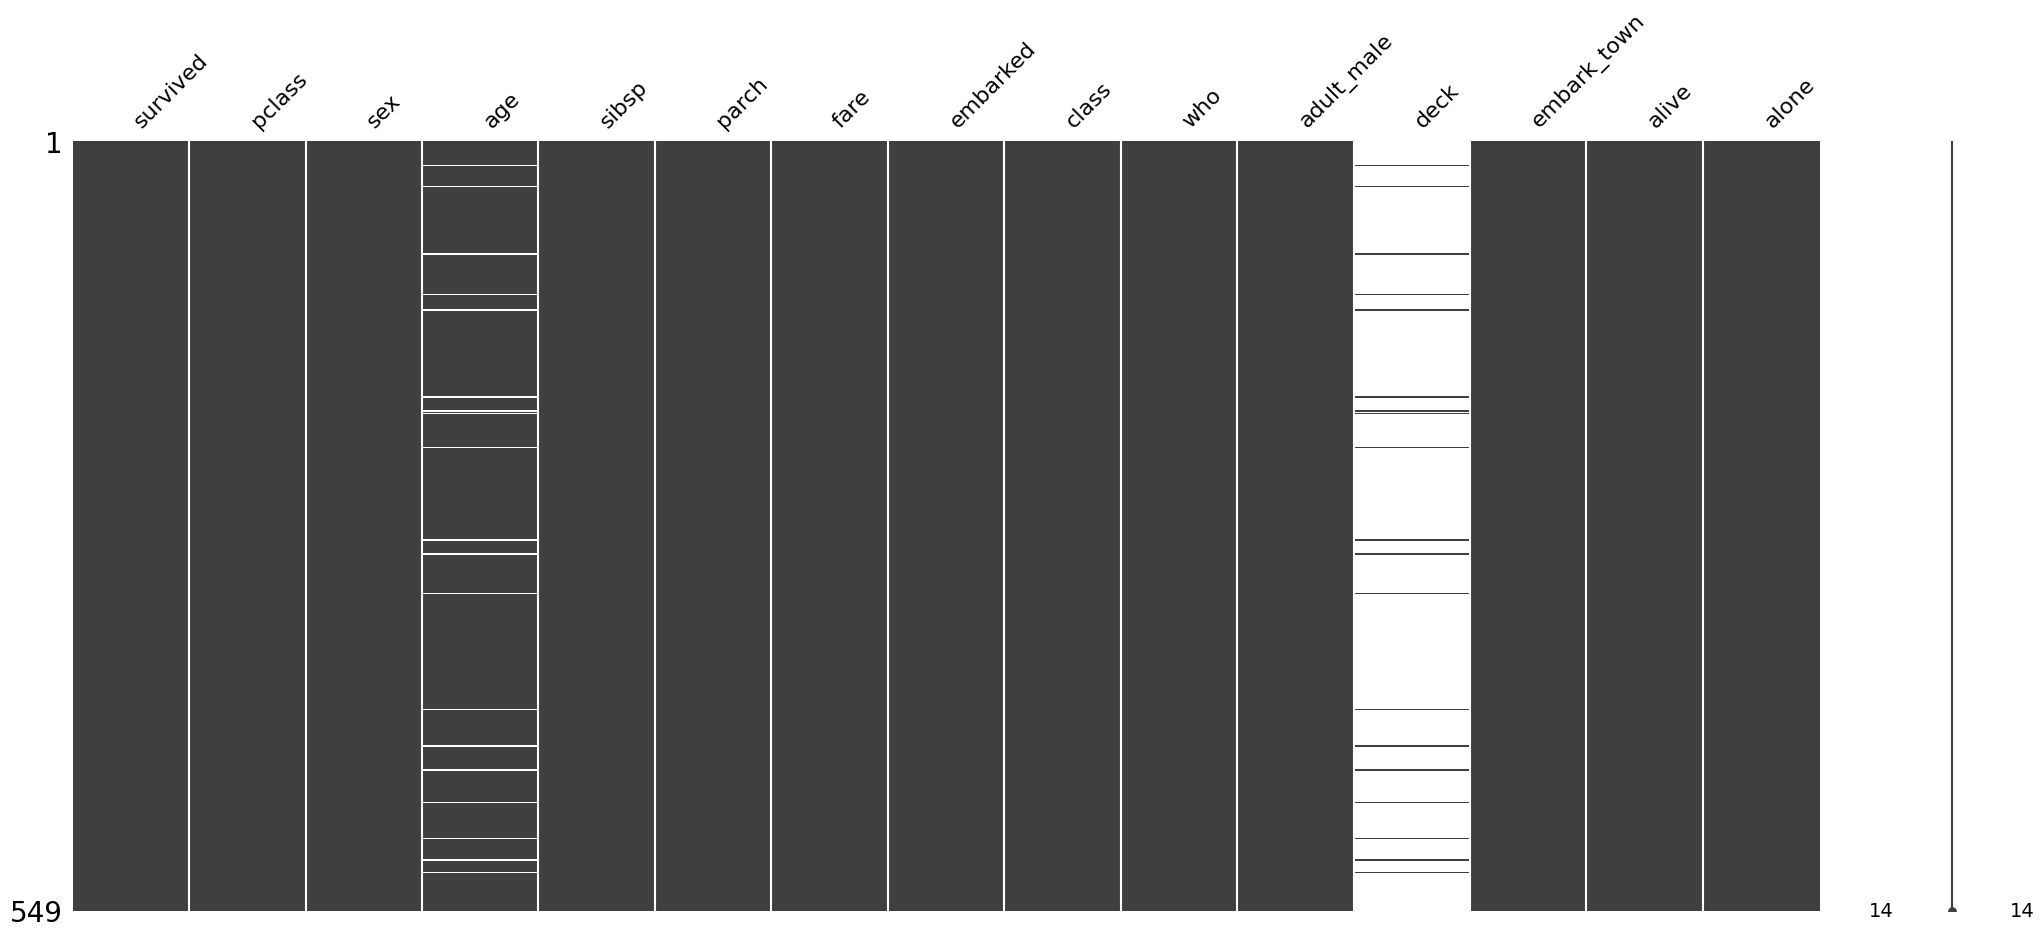

In [ ]:
msno.matrix(tdf[tdf.isna().sum(axis=1) == 1]);

In [ ]:
tdf[tdf.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [ ]:
# 두 열, age, deck이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 세 개 열, age, deck, embark_town이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna()) & (tdf.embark_town.isna())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [ ]:
# 최소한 1개의 NaN에 있는 행 추출
tdf[tdf.isna().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


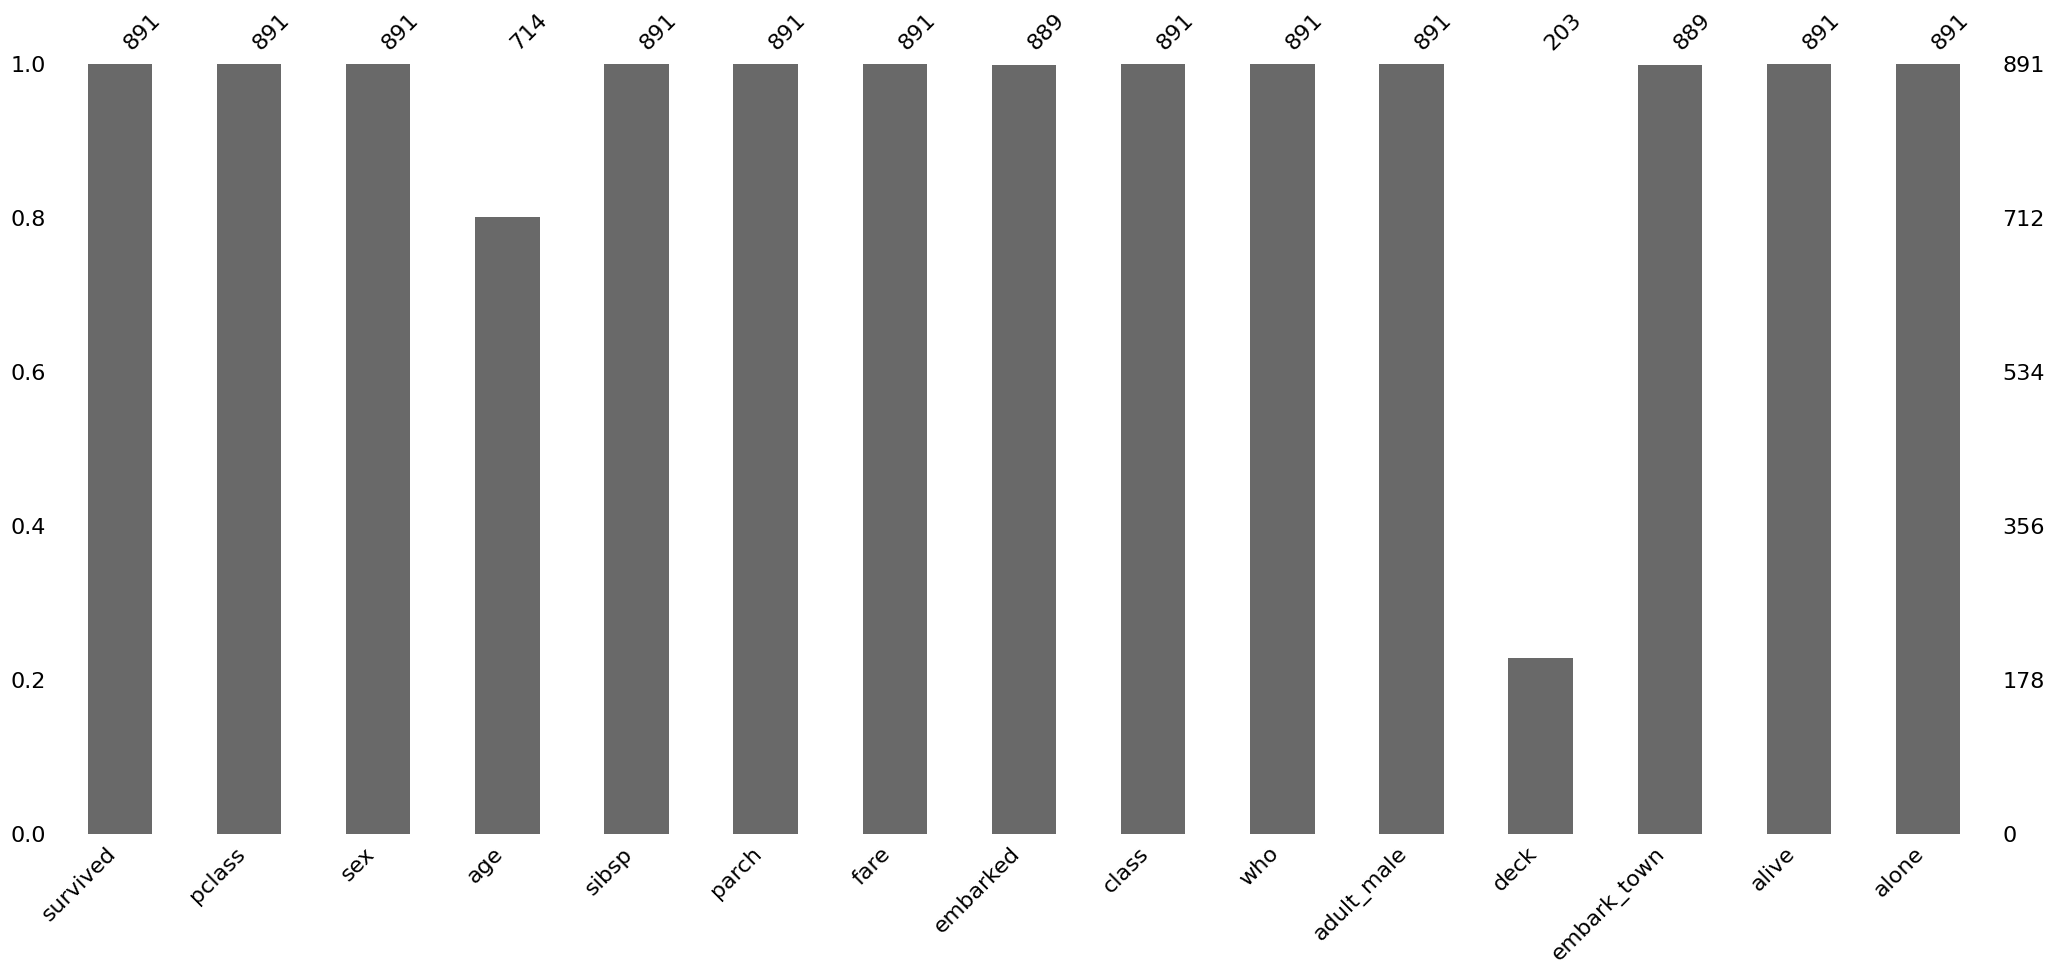

In [ ]:
msno.bar(tdf);

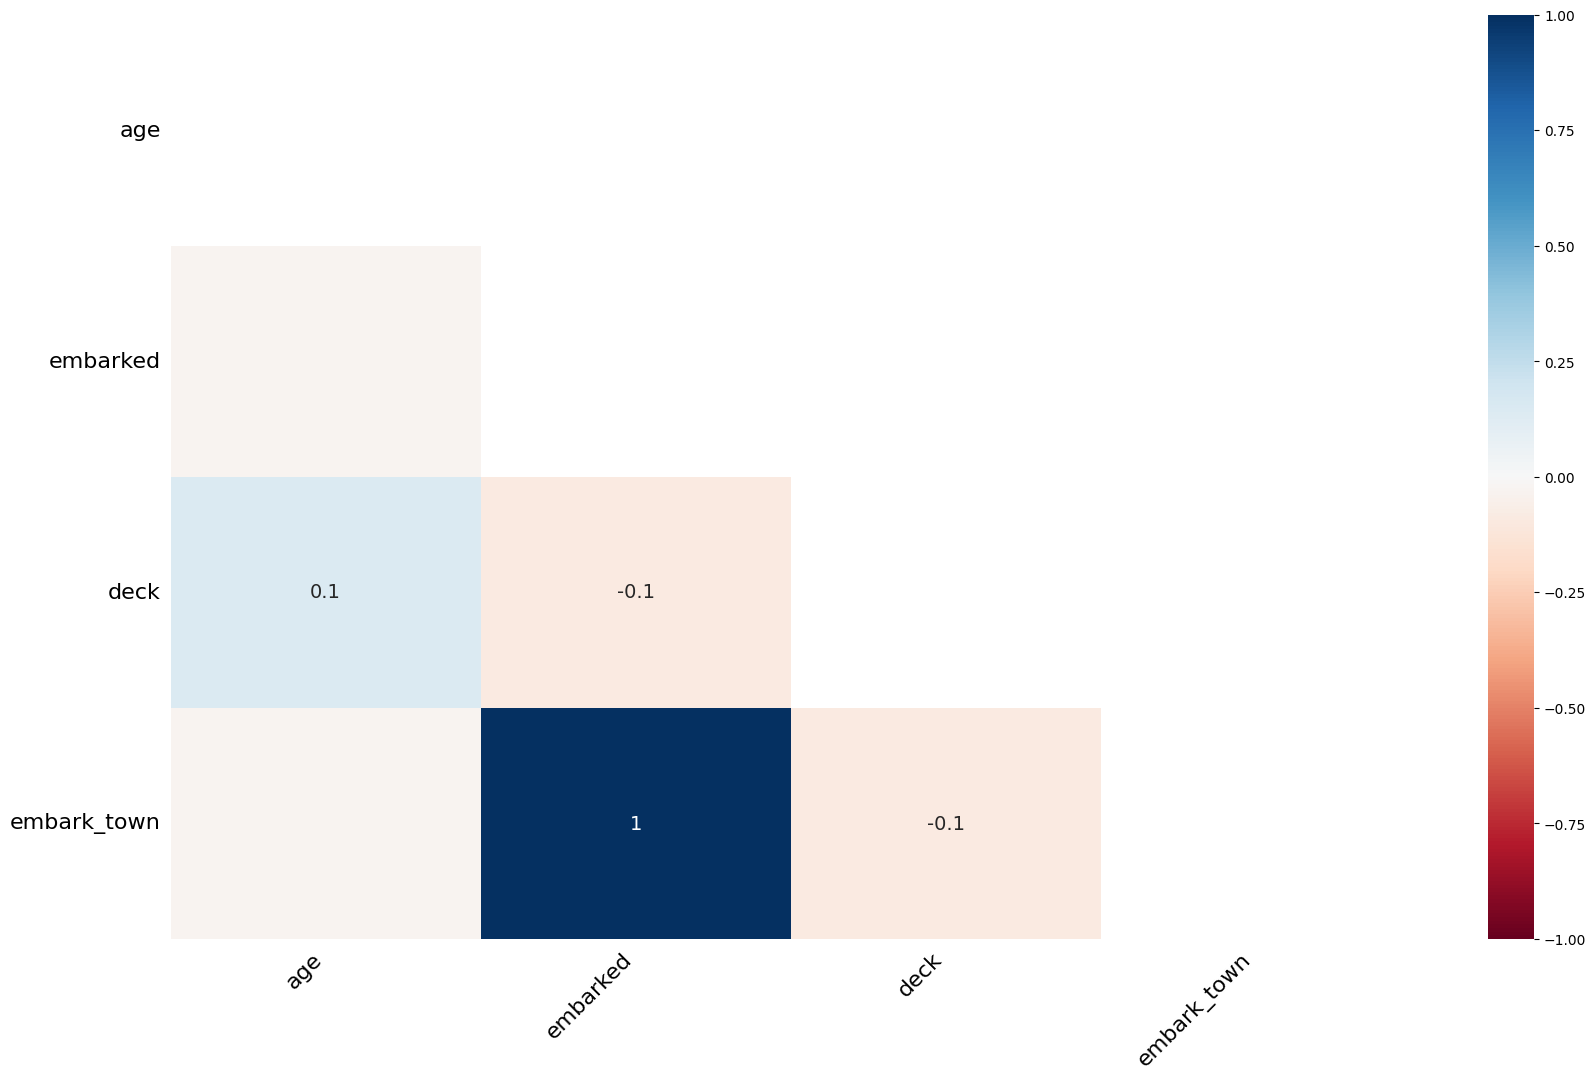

In [ ]:
msno.heatmap(tdf);

끝